### Setup

In [11]:
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [7]:
X, y = mnist.data, mnist.target

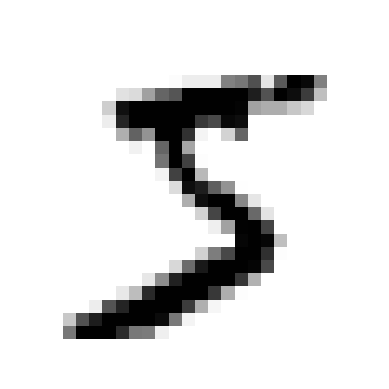

In [8]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

plot_digit(X[0])
plt.show()

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Measuring performance

In [14]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [15]:
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_predict = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)
cm = confusion_matrix(y_train_5, y_train_predict) 

In [18]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_predict)

0.7325171197343847

#### Precision-Recall curve

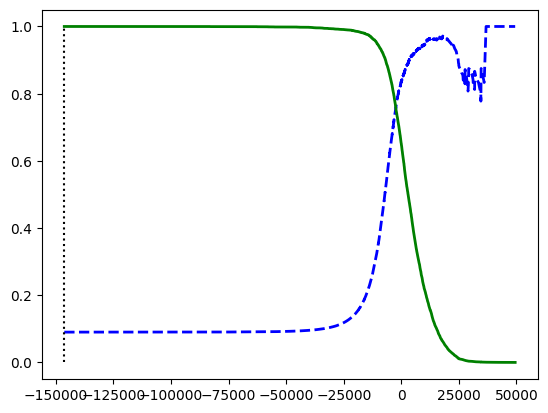

In [19]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(thresholds[0], 0, 1.0, "k", "dotted", label="threshold")
plt.show()

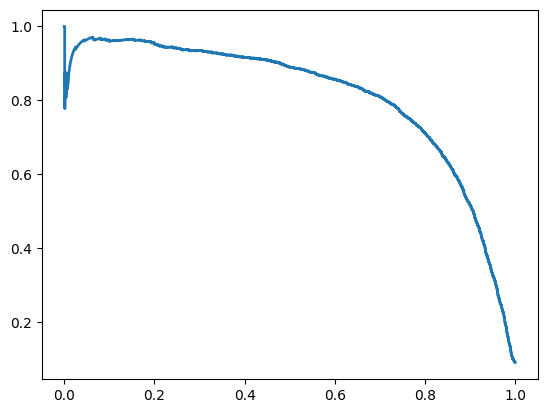

In [20]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.show()

In [21]:
idx_for_90_precision = (precisions >= 0.9).argmax()
thresholds[idx_for_90_precision]

np.float64(3370.0194991439557)

#### ROC curve

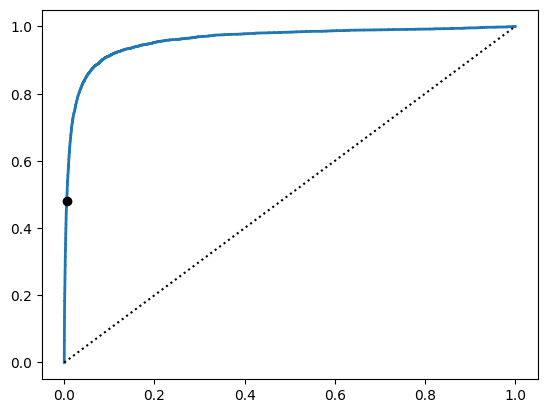

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

idx_for_threshold_at_90 = (thresholds <= 3370).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

plt.show()

In [25]:
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(random_state=42)
forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_probas_forest = cross_val_predict(forest_classifier, X_train, y_train_5, cv=3, method="predict_proba")

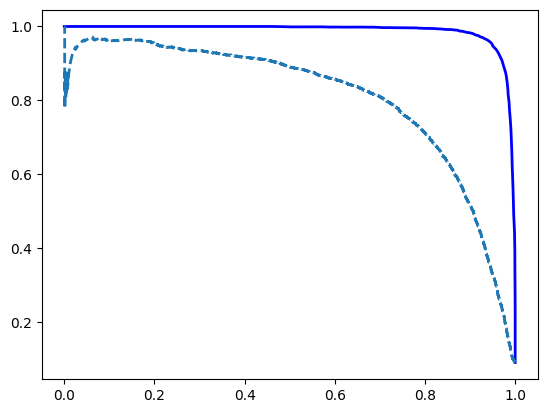

In [29]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
[...] # beautify the figure: add labels, grid, and legend
plt.show()

#### Multiclass classification

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
X_train_small, y_train_small = X_train[:2000], y_train[:2000]

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_small, y_train_small)


SGDClassifier(random_state=42)

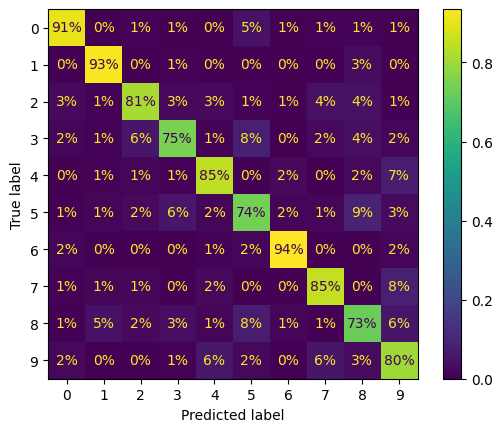

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_predictions = cross_val_predict(sgd_clf, X_train_small, y_train_small, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train_small, y_train_predictions, normalize="true", values_format=".0%")
plt.show()